### Load and Output the Images

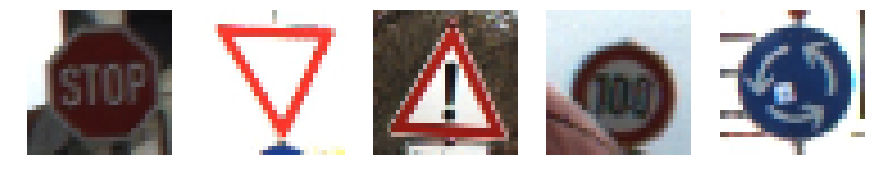

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

images = []
y_labels = [14,13,18,7,40]
f3 = plt.figure(figsize=(15,15))
for i in range(0,5):
    img = mpimg.imread('./signs/%i.jpg' % i)
    img = cv2.resize(img, (32,32))
    images.append(preprocess(img))
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.imshow(img)

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))

    for i in range(0, len(images)):
        accuracy = evaluate(images[i:i+1], y_labels[i:i+1])
        #print(y_labels[i], "Test Accuracy = {:.3f}".format(accuracy))
        
softmax = tf.nn.softmax(logits)

with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))
    predictions = session.run(softmax, feed_dict={x: images})

INFO:tensorflow:Restoring parameters from .\lenet
INFO:tensorflow:Restoring parameters from .\lenet


### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, 
### it's 20% accurate on these new images.

correct = 0

for i in range(0,5):
    if predictions[i].argmax() == y_labels[i]:
        correct += 20

print("Prediction Accuracy = {:.1f}%".format(correct))

Prediction Accuracy = 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top5 = tf.nn.top_k(predictions, k=5)

with tf.Session() as session:
    tops = session.run(top5)
    print(tops)

TopKV2(values=array([[  1.00000000e+00,   1.26159014e-10,   2.64984389e-11,
          1.38552685e-11,   2.27271652e-12],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.98963118e-01,   1.02678500e-03,   9.80962704e-06,
          3.38983000e-07,   1.84928725e-10],
       [  9.99998212e-01,   1.79268829e-06,   1.12268356e-13,
          4.80560141e-19,   2.60959605e-24]], dtype=float32), indices=array([[14, 15,  9,  2, 13],
       [13,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [ 7,  5, 10,  9, 16],
       [37, 40,  4,  1, 26]]))
